In [1]:
print("Check Bipartite using DFS Algorithm Implementation:")
import networkx as nx
import matplotlib.pyplot as plt

Check Bipartite using DFS Algorithm Implementation:


In [2]:
# graph = {
#     0: [1, 2],
#     1: [0, 2, 4, 5],
#     2: [0, 1, 3, 6],
#     3: [2],
#     4: [1, 5],
#     5: [1, 4, 6],
#     6: [2, 5],
#     7: [8],
#     8: [7, 9],
#     9: [8]
# }

# graph = {
#     's': ['z', 'w'],
#     't': ['v', 'u'],
#     'u': ['t', 'v'],
#     'v': ['s', 'w'],
#     'w': ['x'],
#     'x': ['z'],
#     'y': ['x'],
#     'z': ['y', 'w'],
# }

# graph = {
#     0: [1, 2],
#     1: [0, 2],
#     2: [0, 1, 3, 4],
#     3: [2, 4],
#     4: [2, 3],
#     5: [6],
#     6: [5, 7],
#     7: [6],
#     8: [9],
#     9: [8],
#     10: []
# }

graph = {
    0: [4],
    1: [5],
    2: [4],
    3: [5],
    4: [0,2],
    5: [1, 3],
    6: [7],
    7: [6, 9],
    8: [9],
    9: [8]
}

position = {
    0: (1,11),
    1: (1,9),
    2: (1,7),
    3: (1,5),
    4: (4,10),
    5: (4, 8),
    6: (4, 6),
    7: (1, 3),
    8: (1,1),
    9: (4,2)
}

In [3]:
# replacing the name color with visited information

# visited = [False for u in graph]
# parent = [None for u in graph]
# start = [-1 for u in graph]
# finish = [-1 for u in graph]
# t = 0

color = {}
# this is for 2 coloring of the graph Red and Blue
visited = {}
parent = {}
start = {}
finish = {}
t = 0

for u in graph:
    visited[u] = False
    parent[u] = None
    start[u] = -1
    finish[u] = -1
    color[u] = 'White'
    
#modification for coloring left below this line

def dfs(graph):

    for u in graph:
        if visited[u] == False:
            color[u] = 'Red'
            bipartite = dfs_visit(graph, u)
            if bipartite == False:
                return bipartite
    return bipartite

def dfs_visit(graph, u):
    
    visited[u] = True
    global t
    t += 1
    start[u] = t
    
    printInfo(u)
        
    for v in graph[u]:
        bipartite = None
        if visited[v] == True:
            if color[u] == color[v]:
                print("Abort Mission")
                bipartite = False
                return False
        elif visited[v] == False:
            if color[u] == 'Red':
                color[v] = 'Blue'
            else:
                color[v] = 'Red'
            parent[v] = u
            bipartite = dfs_visit(graph, v)
            if(bipartite == False):
                return False
            printInfo(u) 
                   
    t += 1
    finish[u] = t
    #visited[u] = True
    
    printInfo(u)
    return bipartite
    
def printInfo(u):
    print("Node:", u, color[u])
#     print("Visited:", visited[u])
#     print("Start:", start[u])
#     print("Finish:", finish[u])
#     print("Parent:", parent[u])
#     print()
    return
    
def printAllInfo(graph):
    
#     print("Node\t Start\t Finish\t Parent")
#     for u in graph:
#         print(u, "\t", start[u], "\t", finish[u], "\t", parent[u])
    return

In [4]:
dfs(graph)

Node: 0 Red
Node: 4 Blue
Node: 2 Red
Node: 2 Red
Node: 4 Blue
Node: 4 Blue
Node: 0 Red
Node: 0 Red
Node: 1 Red
Node: 5 Blue
Node: 3 Red
Node: 3 Red
Node: 5 Blue
Node: 5 Blue
Node: 1 Red
Node: 1 Red
Node: 6 Red
Node: 7 Blue
Node: 9 Red
Node: 8 Blue
Node: 8 Blue
Node: 9 Red
Node: 9 Red
Node: 7 Blue
Node: 7 Blue
Node: 6 Red
Node: 6 Red


In [5]:
printAllInfo(graph)

In [6]:
color

{0: 'Red',
 1: 'Red',
 2: 'Red',
 3: 'Red',
 4: 'Blue',
 5: 'Blue',
 6: 'Red',
 7: 'Blue',
 8: 'Blue',
 9: 'Red'}

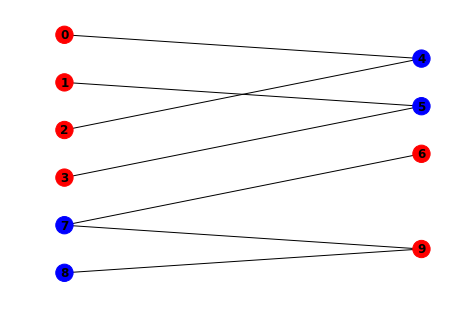

In [7]:
G = nx.Graph()
G.clear()

for u in graph:
    G.add_node(str(u), pos = position[u])
    
for u in graph:
    for v in graph[u]:
        G.add_edge(str(u), str(v))
        
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos,with_labels=True, font_weight='bold', node_color=[color[u] for u in graph])
plt.show()